# Natural Disasters Data

## The Dataset

### Aggregated figures for Natural Disasters in EM-DAT

Link: https://data.humdata.org/dataset/emdat-country-profiles


In 1988, the **Centre for Research on the Epidemiology of Disasters (CRED)** launched the **Emergency Events Database (EM-DAT)**. EM-DAT was created with the initial support of the **World Health Organisation (WHO) and the Belgian Government**.

The main objective of the database is to **serve the purposes of humanitarian action at national and international levels**. The initiative aims to rationalise decision making for disaster preparedness, as well as provide an objective base for vulnerability assessment and priority setting.

EM-DAT contains essential core data on the **occurrence and effects of over 22,000 mass disasters in the world from 1900 to the present day**. The database is compiled from various sources, including UN agencies, non-governmental organisations, insurance companies, research institutes and press agencies.



## Recherchefragen

- Wie stark ist ein Land von Naturkatastrophen betroffen?
- Wie viele Todesopfer gibt es insgesamt?
- Welchen Anteil haben die unterschiedlichen Naturkatastrophentypen daran?
- Wie hat sich die Anzahl der Naturkatastrophen über die Jahre hin entwickelt?

In [1]:
# Install all necessary packages
!pip install --upgrade pip
!pip install --upgrade Pillow
!pip install matplotlib
!pip install pandas
!pip install openpyxl
!pip install seaborn

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_excel('../data/emdat.xlsx', engine="openpyxl")

In [3]:
data

,Year,Country,ISO,Disaster Group,Disaster Subroup,Disaster Type,Disaster Subtype,Total Events,Total Affected,Total Deaths,"Total Damage (USD, original)","Total Damage (USD, adjusted)",CPI
0,#date +occurred,#country +name,#country +code,#cause +group,#cause +subgroup,#cause +type,#cause +subtype,#frequency,#affected +ind,#affected +ind +killed,NaN,#value +usd,NaN
1,2000,Afghanistan,AFG,Natural,Climatological,Drought,Drought,1,2580000,37,50000.0,84975,58.840648
2,2000,Algeria,DZA,Natural,Hydrological,Flood,Flash flood,2,105,37,NaN,NaN,58.840648
3,2000,Algeria,DZA,Natural,Hydrological,Flood,Flood (General),2,100,7,NaN,NaN,58.840648
4,2000,Algeria,DZA,Natural,Meteorological,Storm,Storm (General),1,10,4,NaN,NaN,58.840648
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5834,2023,Viet Nam,VNM,Natural,Meteorological,Storm,Tropical cyclone,1,3,1,NaN,NaN,NaN
5835,2023,Yemen,YEM,Natural,Hydrological,Flood,Flood (General),1,169035,39,NaN,NaN,NaN
5836,2023,Zambia,ZMB,Natural,Hydrological,Flood,Flash flood,1,154608,NaN,NaN,NaN,NaN
5837,2023,Zambia,ZMB,Natural,Hydrological,Flood,Flood (General),1,22000,NaN,NaN,NaN,NaN


In [8]:
data = data.drop(index=0)
cols = ['Year', 'Total Events', 'Total Affected', 'Total Deaths', 'Total Damage (USD, adjusted)']
for col in cols:
    data[col] = pd.to_numeric(data[col])

In [9]:
cols = ['ISO', 'Disaster Group', 'Total Damage (USD, adjusted)']
data.drop(cols, axis=1, inplace=True)

In [10]:
data = data.dropna(subset=['Disaster Subtype', 'Total Affected'])
data["Total Affected"].fillna(data['Total Deaths'], inplace=True)
data.drop_duplicates()

,Year,Country,Disaster Subroup,Disaster Type,Disaster Subtype,Total Events,Total Affected,Total Deaths,"Total Damage (USD, original)",CPI
1,2000,Afghanistan,Climatological,Drought,Drought,1,2580000.0,37.0,50000.0,58.840648
2,2000,Algeria,Hydrological,Flood,Flash flood,2,105.0,37.0,NaN,58.840648
3,2000,Algeria,Hydrological,Flood,Flood (General),2,100.0,7.0,NaN,58.840648
4,2000,Algeria,Meteorological,Storm,Storm (General),1,10.0,4.0,NaN,58.840648
5,2000,Angola,Hydrological,Flood,Flood (General),3,9011.0,15.0,NaN,58.840648
...,...,...,...,...,...,...,...,...,...,...
5833,2023,Viet Nam,Hydrological,Flood,Flood (General),1,463.0,4.0,NaN,NaN
5834,2023,Viet Nam,Meteorological,Storm,Tropical cyclone,1,3.0,1.0,NaN,NaN
5835,2023,Yemen,Hydrological,Flood,Flood (General),1,169035.0,39.0,NaN,NaN
5836,2023,Zambia,Hydrological,Flood,Flash flood,1,154608.0,NaN,NaN,NaN


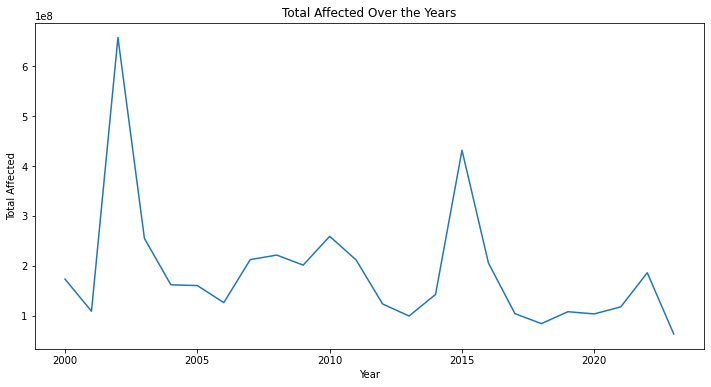

In [12]:
# Plot Total Affected over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Total Affected', data=data, estimator='sum', errorbar=None)
plt.title('Total Affected Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Affected')
plt.show()


In [ ]:

# Plot Total Events by Disaster Subgroup
plt.figure(figsize=(14, 8))
sns.countplot(x='Year', data=data, hue='Disaster Type', palette='Set2')
plt.title('Total Events by Disaster Type')
plt.xlabel('year')
plt.ylabel('Total Events')
plt.xticks(rotation=45)
plt.show()


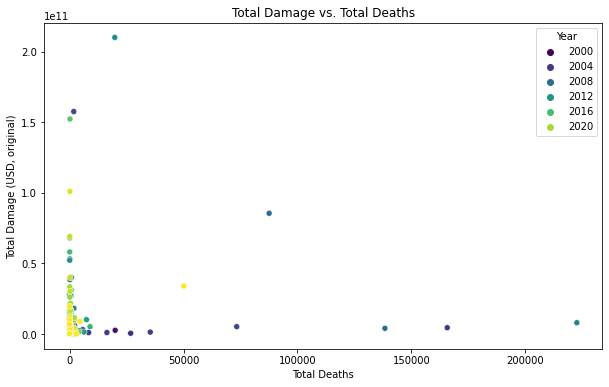

In [54]:
# Plot Total Damage vs. Total Deaths
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Deaths', y='Total Damage (USD, original)', data=data, hue='Year', palette='viridis')
plt.title('Total Damage vs. Total Deaths')
plt.xlabel('Total Deaths')
plt.ylabel('Total Damage (USD, original)')
plt.show()

In [38]:
def create_title(country):
    '''takes a country string and return the title'''
    return f'\n\n Naturkatastrophen in {country} \n\n'.upper()

In [23]:
def plot_pie(country_data):
    '''creates a pie chart with the total deaths per disaster type'''
    deaths_per_disaster = country_data.groupby('Disaster Type')['Total Deaths'].sum()
    deaths_per_disaster.plot(kind='pie', title='Anteil an getöten Menschen nach Naturkatastrophentyp')
    plt.show()

In [39]:
def plot_time_evolution(country_data):
    '''plots the number of natural disasters over the years'''
    yearly_events = country_data.groupby('Year')['Total Events'].sum()
    yearly_events.plot(kind='line', x='Year', y='Total Events', title='Anzahl an Naturkatastrophen pro Jahr')
    plt.show()

In [40]:
def death_overview(country_data):
    '''prints the total number of death people '''
    total_deaths = country_data["Total Deaths"].sum()
    print(f'Getötete Menschen seit 1900: {total_deaths:,.0f}')

In [41]:
def compute_anteil(country_total, world_total):
    '''computes the percentage of people affected compared to the world'''
    anteil = round(country_total / (world_total / 100.0), 2)
    print(f'{anteil}% aller Menschen die weltweit von Naturkatastrophen betroffen sind leben hier.\n')

In [42]:
def analyze(data, country='world'):
    '''brings all functions together to create a country report'''
    print(create_title(country))
    
    # extract the data belonging to a country
    country_data = data[data['Country'] == country]  
    # if 'world' is the argument the full dataset is evaluated
    if country == 'world':
        country_data = data
    
    # compute the number of people affected
    compute_anteil(country_data['Total Affected'].sum(), data['Total Affected'].sum())
    death_overview(country_data)
    
    # plot the graphs
    plot_pie(country_data)
    plot_time_evolution(country_data)



 NATURKATASTROPHEN IN GERMANY 


0.01% aller Menschen die weltweit von Naturkatastrophen betroffen sind leben hier.

Getötete Menschen seit 1900: 296


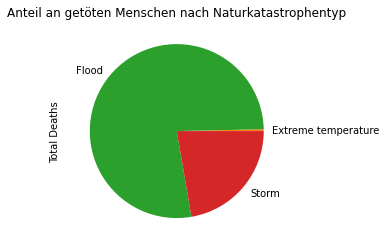

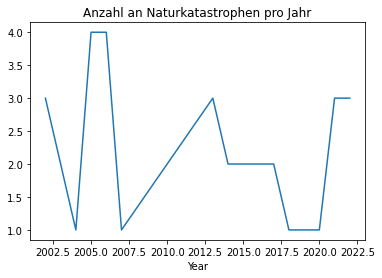

In [43]:
analyze(data, 'Germany')



 NATURKATASTROPHEN IN INDIA 


24.57% aller Menschen die weltweit von Naturkatastrophen betroffen sind leben hier.

Getötete Menschen seit 1900: 87,391


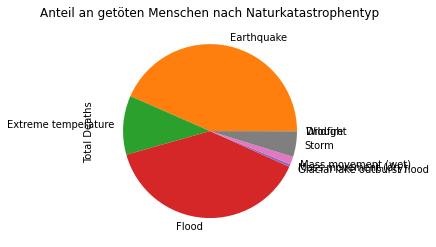

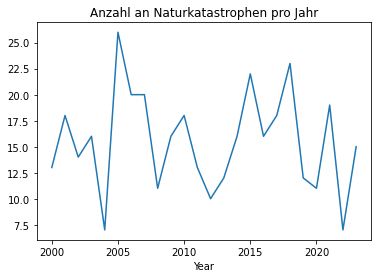

In [30]:
analyze(data, 'India')